In [2]:
import numpy as np #библиотека для работы с n-мерными массивами, линейной алгеброй, статистикой и т.д.
import matplotlib.pyplot as plt #для отрисовки графиков и диаграмм
import pandas as pd #библиотека для обработки и анализа данных
from sklearn.linear_model import LinearRegression #импорт функции линейной регрессии
from sklearn.tree import DecisionTreeRegressor #импорт функции обучения дерева решений
from sklearn.metrics import mean_squared_error #импорт функции средней суммы квадратов отклонений
from datetime import timedelta

data = pd.read_csv('EventsByTimes') #объявляем переменную, в которую записываем табличные данные
data

,Id,DateTime,SumEventByTime,SumMedium,SumHigh
0,1198782,2022-09-09 16:13:33.254398,271,2,0
1,1198783,2022-09-09 16:14:33.245376,291,4,0
2,1198784,2022-09-09 16:15:33.257618,349,1,0
3,1198785,2022-09-09 16:16:33.255939,287,4,0
4,1198786,2022-09-09 16:17:33.259167,335,2,0
...,...,...,...,...,...
1247135,1198777,2022-09-09 16:08:33.251708,313,3,0
1247136,1198778,2022-09-09 16:09:33.24986,273,1,0
1247137,1198779,2022-09-09 16:10:33.253967,329,5,0
1247138,1198780,2022-09-09 16:11:33.252432,296,6,0


In [3]:
type(data["DateTime"][0])

str

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
#отсортируем строки по полю Id
data_sorted = data.sort_values(by='Id')
data_sorted["DateTime"] = pd.to_datetime(data_sorted["DateTime"]) 
print(type(data_sorted))
print(type(data_sorted["DateTime"][1]))

data_sorted



<class 'pandas.core.frame.DataFrame'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Id,DateTime,SumEventByTime,SumMedium,SumHigh
48455,1,2019-11-28 18:45:45.457929,0,0,0
48456,2,2019-11-28 18:45:48.605591,482,0,0
48457,3,2019-11-28 18:46:48.518908,363,0,0
48458,4,2019-11-28 18:47:48.466795,371,0,0
48459,5,2019-11-28 18:48:48.431212,342,0,0
...,...,...,...,...,...
48450,1247294,2022-10-17 13:01:50.995897,197,3,0
48451,1247295,2022-10-17 13:02:50.994140,248,6,0
48452,1247296,2022-10-17 13:03:50.991127,254,7,0
48453,1247297,2022-10-17 13:04:50.989884,173,4,0


In [6]:
print(data.equals(data_sorted))
data

False


,Id,DateTime,SumEventByTime,SumMedium,SumHigh
0,1198782,2022-09-09 16:13:33.254398,271,2,0
1,1198783,2022-09-09 16:14:33.245376,291,4,0
2,1198784,2022-09-09 16:15:33.257618,349,1,0
3,1198785,2022-09-09 16:16:33.255939,287,4,0
4,1198786,2022-09-09 16:17:33.259167,335,2,0
...,...,...,...,...,...
1247135,1198777,2022-09-09 16:08:33.251708,313,3,0
1247136,1198778,2022-09-09 16:09:33.24986,273,1,0
1247137,1198779,2022-09-09 16:10:33.253967,329,5,0
1247138,1198780,2022-09-09 16:11:33.252432,296,6,0


Проверим исходные данные в укрупнённых группах по суммам: за день, за неделю, за месяц.

In [7]:
#создаём DataFrame в котором содержатся суммы событий за день

ds_days = pd.Series(pd.date_range("2019-11-28", "2022-10-17", freq="D", name="date"))


df_days = pd.DataFrame(ds_days)
df_days["sum"] = 0
print(type(df_days))
x_days = 0 
for item in df_days["date"]:
    data2 = data_sorted[data_sorted['DateTime'].between(item, item + timedelta(1))]
    #for i2 in data2["SumEventByTime"]:
    #    if(i2 > 100):
    #        i2 = 100
    
    sum = data2["SumEventByTime"].sum()
    df_days["sum"][x_days] = sum
    x_days = x_days+1
    
df_days

<class 'pandas.core.frame.DataFrame'>


C:\Users\p.uvarov\AppData\Local\Temp\ipykernel_16028\492670770.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_days["sum"][x_days] = sum


,date,sum
0,2019-11-28,4032
1,2019-11-29,52716
2,2019-11-30,0
3,2019-12-01,0
4,2019-12-02,48096
...,...,...
1050,2022-10-13,268293
1051,2022-10-14,243161
1052,2022-10-15,246657
1053,2022-10-16,245016


In [8]:
#создаём DataFrame в котором содержатся суммы событий за неделю
ds_weeks = pd.Series(pd.date_range("2019-11-28", "2022-10-17", freq="W", name="date"))


df_weeks = pd.DataFrame(ds_weeks)
df_weeks["sum"] = 0
print(type(df_weeks))
x_weeks = 0 
for item in df_weeks["date"]:
    data2 = data_sorted[data_sorted['DateTime'].between(item, item + timedelta(7))]
    #for i2 in data2["SumEventByTime"]:
    #    if(i2 > 100):
    #        i2 = 100
    
    sum = data2["SumEventByTime"].sum()
    df_weeks["sum"][x_weeks] = sum
    x_weeks = x_weeks+1
    
df_weeks

<class 'pandas.core.frame.DataFrame'>


C:\Users\p.uvarov\AppData\Local\Temp\ipykernel_16028\2131440471.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weeks["sum"][x_weeks] = sum


,date,sum
0,2019-12-01,940988
1,2019-12-08,1061281
2,2019-12-15,355178
3,2019-12-22,179464
4,2019-12-29,0
...,...,...
146,2022-09-18,2165821
147,2022-09-25,950682
148,2022-10-02,302214
149,2022-10-09,1211386


In [9]:
#создаём DataFrame в котором содержатся суммы событий за месяц
ds_months = pd.Series(pd.date_range("2019-12", "2022-10", freq="M", name="date"))


df_months = pd.DataFrame(ds_months)
df_months["sum"] = 0
print(type(df_months))
x_months = 0 
for item in df_months["date"]:
    data2 = data_sorted[data_sorted['DateTime'].between(item, item + timedelta(30))]
    #for i2 in data2["SumEventByTime"]:
    #    if(i2 > 100):
    #        i2 = 100
    
    sum = data2["SumEventByTime"].sum()
    df_months["sum"][x_months] = sum
    x_months = x_months+1
    
df_months

<class 'pandas.core.frame.DataFrame'>


C:\Users\p.uvarov\AppData\Local\Temp\ipykernel_16028\2991688092.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_months["sum"][x_months] = sum


,date,sum
0,2019-12-31,75830
1,2020-01-31,345951
2,2020-02-29,4486074
3,2020-03-31,19415381
4,2020-04-30,18385894
5,2020-05-31,6358565
6,2020-06-30,5348357
7,2020-07-31,24820668
8,2020-08-31,23438072
9,2020-09-30,12674166


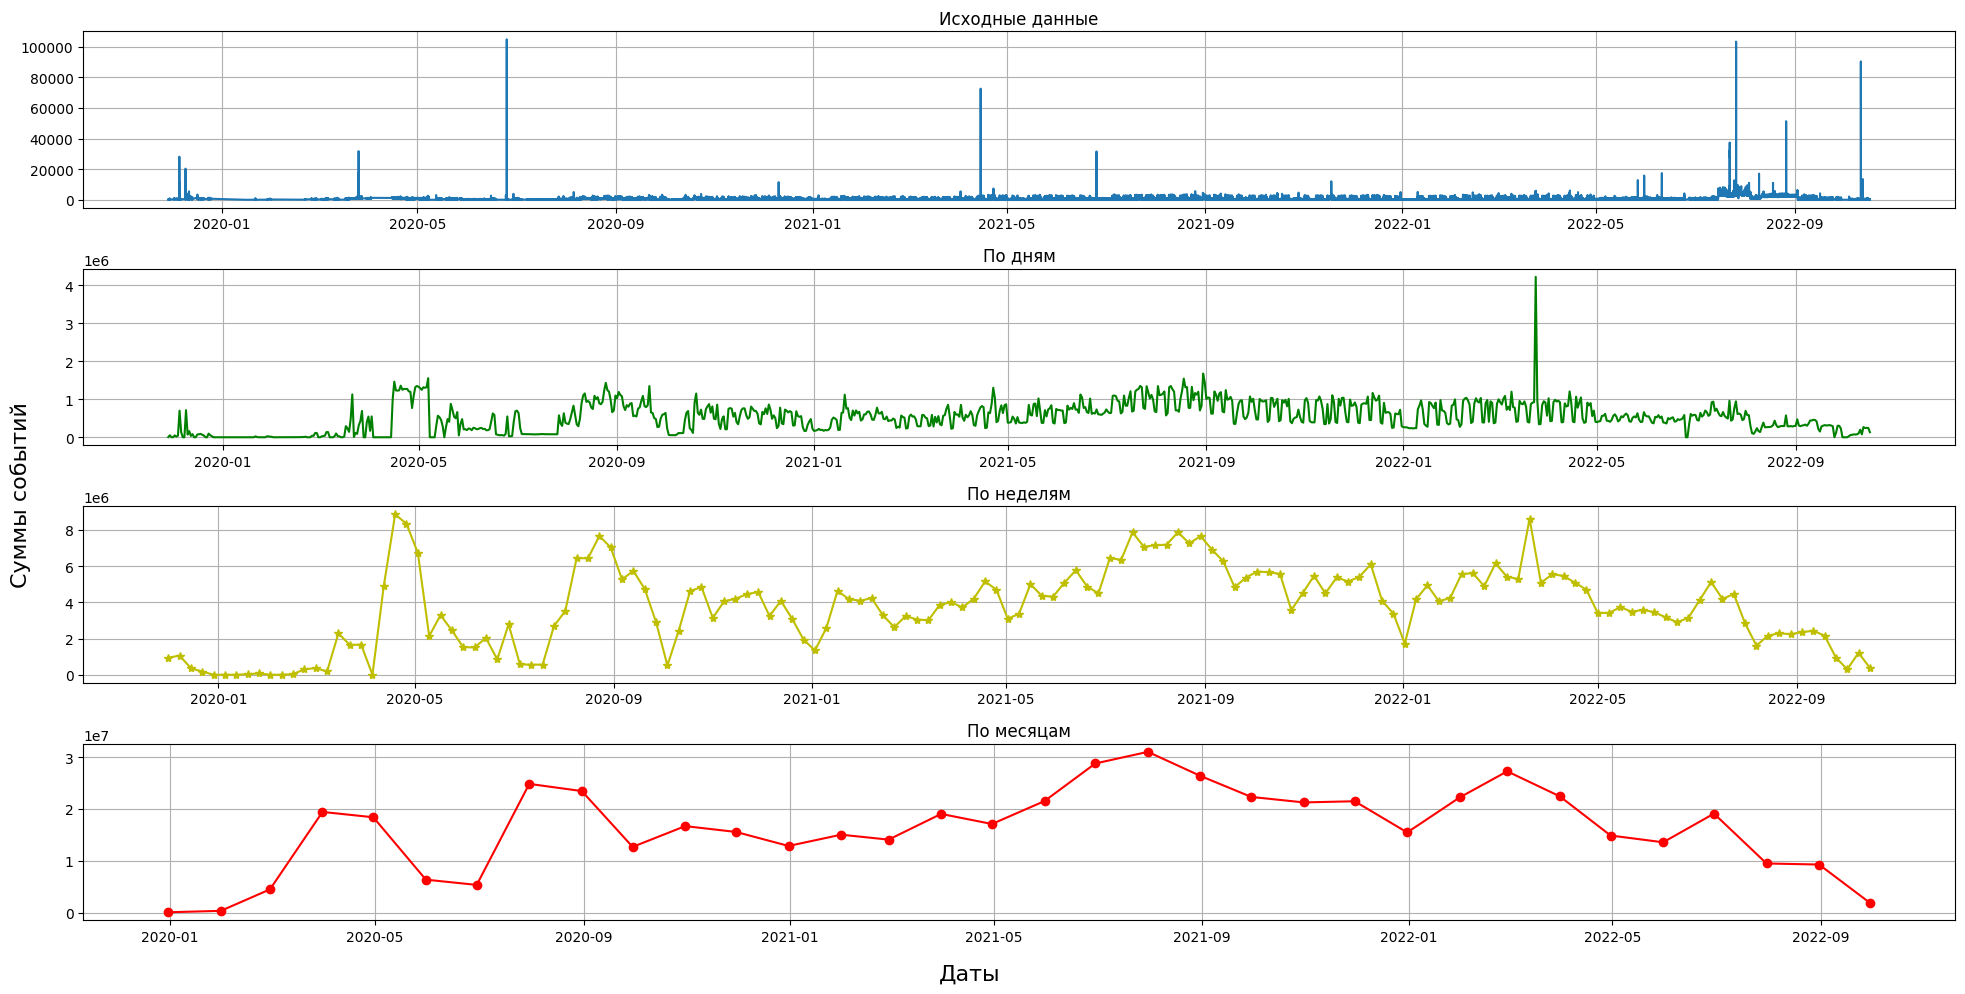

In [40]:
#построим графики
from ctypes import alignment


fig = plt.figure(figsize=(20,10))

plt.subplot(4, 1, 1)
plt.plot(data_sorted["DateTime"],data_sorted["SumEventByTime"])
plt.title('Исходные данные')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(df_days["date"], df_days["sum"], "g")
plt.title('По дням')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(df_weeks["date"], df_weeks["sum"], "y-*")
plt.title('По неделям')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(df_months["date"], df_months["sum"], "r-o")
plt.title('По месяцам')
plt.grid(True)


fig.supxlabel('Даты', fontsize=16)
fig.supylabel('Суммы событий', fontsize=16)
fig.tight_layout()



plt.show()